Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170. L = 0.05
Выполняется в программе.

![pic](pic/pic.jpeg)

In [19]:
import pandas as pd
from scipy import stats
import numpy as np

In [20]:
array1 = np.array([173, 175, 180, 178, 177, 185, 183, 182], dtype=np.float64)
array2 = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180], dtype=np.float64)
array3 = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170], dtype=np.float64)


In [21]:
data = {'Футболисты': array1, 'Хоккеисты': array2, 'Штангисты': array3}
df_data = pd.DataFrame.from_dict(data, orient='index').T

In [22]:
print('Нулевая гипотеза:', '='.join(df_data))
print('Альтернативная гипотеза:', f'!({"=".join(df_data)})')

Нулевая гипотеза: Футболисты=Хоккеисты=Штангисты
Альтернативная гипотеза: !(Футболисты=Хоккеисты=Штангисты)


In [23]:
# описательные статистики

df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Футболисты,8.0,179.125000,4.120940,173.0,176.5,179.0,182.25,185.0
Хоккеисты,9.0,178.666667,5.338539,171.0,177.0,179.0,180.00,188.0
Штангисты,11.0,172.727273,4.797727,166.0,169.5,172.0,177.00,180.0


In [24]:
df = df_data.agg(
    ['mean', 'std', 'count', 'sem']).transpose()
df.columns = ['mx', 'sd', 'n', 'se']

df

,mx,sd,n,se
Футболисты,179.125000,4.120940,8.0,1.456972
Хоккеисты,178.666667,5.338539,9.0,1.779513
Штангисты,172.727273,4.797727,11.0,1.446569


In [25]:
# 95% интервал отклонения среднего
p = 0.95
K = stats.t.ppf((1 + p) / 2, df['mx'] - 1)
df['interval'] = K * df['se']

df

,mx,sd,n,se,interval
Футболисты,179.125000,4.120940,8.0,1.456972,2.875147
Хоккеисты,178.666667,5.338539,9.0,1.779513,3.511702
Штангисты,172.727273,4.797727,11.0,1.446569,2.855346


<AxesSubplot:>

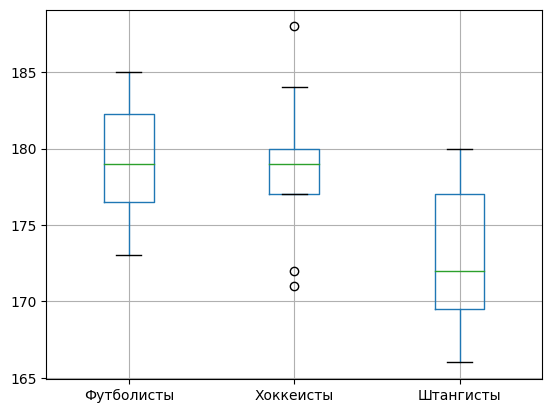

In [26]:
# boxplot для групп
df_data.boxplot()

In [27]:
# общая средняя
mx_df = df_data.values.flatten()
mx_df = np.nanmean(mx_df)
mx_df

176.46428571428572

In [28]:
# отклонение групповых средний от общей средней
ssb = sum(df_data[group].count() * (mx_group - mx_df) ** 2 for group, mx_group in df_data.mean().items())
ssb

253.9074675324678

In [29]:
# отклонения значений в внутри группы от средней группы
ssw = sum(
    np.nansum([(x - mx_group) ** 2 for x in df_data[group].values]) for group, mx_group in df_data.mean().items())

ssw

577.0568181818182

In [30]:
groups = df_data.shape[1]
dfb = groups - 1
dfb

2

In [31]:
df_size = np.sum(df_data.count())
dfw = df_size - groups
dfw


25

In [32]:
# межгрупповой средний квадрат
m_ssb = ssb / dfb
m_ssb

126.9537337662339

In [33]:
# внутригрупповой средний квадрат
m_ssw = ssw / dfw
m_ssw

23.08227272727273

In [34]:
f_value = m_ssb / m_ssw
f_value

5.500053450812598

In [35]:
p = stats.f.sf(f_value, dfb, dfw)
print('Результат: p =', p)
print('Отклоняем нулевую гипотезу') if p < 0.05 else print('Не отклоняем нулевую гипотезу')

Результат: p = 0.010482206918698674
Отклоняем нулевую гипотезу


In [36]:
# или все в одно действие
stats.f_oneway(array1, array2, array3)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)